In [1]:
import torch
import sigkernel
import matplotlib.pyplot as plt
from torchcubicspline import(natural_cubic_spline_coeffs, 
                             NaturalCubicSpline)

from stein_mpc.kernels import GaussianKernel, PathSigKernel

In [2]:
# create two paths with different parameterization
def path_fn(t: torch.Tensor, freq=2.0, offset=0.0):
    PI = torch.asin(torch.tensor(1.))
    return torch.sin(2 * PI * freq * (t + offset)/t.max())

# making the interval with same amount of points so we can compute the RBF kernel
int_1 = torch.arange(100)
int_2 = torch.arange(100)/2
path_1 = path_fn(int_1)
path_2 = path_fn(int_2, offset=10)
path_3 = path_fn(int_2, offset=-10)

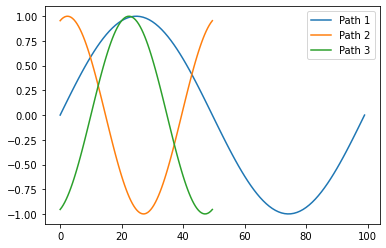

In [3]:
plt.plot(int_1, path_1, label="Path 1")
plt.plot(int_2, path_2, label="Path 2")
plt.plot(int_2, path_3, label="Path 3")
plt.legend()
plt.show()

In [5]:
depth = 3
batched_paths = torch.cat([p.unsqueeze(0) for p in [path_1, path_2, path_3]], dim=0)

k_rbf = GaussianKernel()
k_myps = PathSigKernel()
static_kernel = sigkernel.RBFKernel(sigma=0.5)
k_ps = sigkernel.SigKernel(static_kernel, depth)
streams = batched_paths.unsqueeze(-1).double()

print("Similarity using Gaussian Kernel:\n", k_rbf(path_1, path_2, compute_grad=False))
print("Similarity using Path Signature Kernel on coefficients:\n", k_myps(streams, streams, ref_vector=path_1, depth=depth,compute_grad=False))
print("Similarity using Path Signature Kernel:\n", k_ps.compute_Gram(streams, streams))

torch.Size([3, 100])
Similarity using Gaussian Kernel:
 tensor([[0.7071]])
Similarity using Path Signature Kernel on coefficients:
 tensor([[ 1.0000,  0.8940, -0.8940],
        [ 0.8940,  1.0000, -0.6356],
        [-0.8940, -0.6356,  1.0000]], dtype=torch.float64)
Similarity using Path Signature Kernel:
 tensor([1.0000, 1.0000, 1.0000], dtype=torch.float64)
